2019-11- Jennifer Them
Script for UMAP embedding and HDBScan clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import scipy
import sklearn.neighbors
import umap
import seaborn as sns
import hdbscan
from matplotlib import pyplot as plt
import os
import networkx

#### Color palettes fors plotting

In [2]:
colors6 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449']
colors7 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8']
colors8 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64']
colors9 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701']
colors10 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE']
colors11 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337']
colors12 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337']
colors13 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1']
colors14 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']
colors15 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors16 = ['#808000', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors17 = ['#7DDCAC', '#808000', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors18 = ['#ED1D0C','#808000', '#FA8072', '#7DDCAC', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']

# 8 different color palettes with different amount of colors in it
colors = [colors6, colors7, colors8, colors9, colors10, colors11, colors12, colors13, colors14, colors15, colors16, colors17, colors18]
#sns.set_palette(sns.color_palette(colors18))


# new colors from color brewer (12):
colors_new = ['#8dd3c7', '#BD11A1', '#bebada', '#097E02','#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#b15928', '#6a3d9a', '#38E1F5','#1f78b4','#ff7f00', '#484848', '#ffed6f']
colors_mettalic = ['#4682bf', '#eda6c4', '#aa4069', '#ffe898','#838996', '#c3def3','#cd9575', '#c9ffe5', '#5fa777', '#001440', '#722f37', '#e18e96', '#8e88ce', '#ec5297', '#1b4d3e', '#da680f', '#3399ff', '#d9b611']
sns.set_palette(sns.color_palette(colors_new))

Load data

In [4]:
roi_labels = np.load('/Users/jenniferthem/Masterthesis_Data/roi_labels.npy', allow_pickle=True)
roi_labels_df = pd.DataFrame(roi_labels)
# load the Correlation matrix
corr_dist = np.load('/Users/jenniferthem/Masterthesis_Data/corr_dist_df_baseline.npy')
# old sparse matrix - not used anymore
fc_matrix = np.load('/Users/jenniferthem/Masterthesis_Data/FC_matrix.npy')
ket_matrix = np.load('/Users/jenniferthem/Masterthesis_Data/Ketamine_corr_dist.npy')
placebo_matrix = np.load('/Users/jenniferthem/Masterthesis_Data/Placebo_corr_dist.npy')

#### Function for UMAP embedding and HDBScan clustering: 

**Input**: Correlation matrix, nearest neighbors for UMAP, metric, name of file for saving, save path, cluster selection method for HDBScan and the ROI labels

**Output**: amount of labels from HDBScan, Dataframes of HDBScan labels, ROI labels, amount of data clustered and Dataframe of HDBScan clustered and ROIs

In [5]:
# data, neighbors: how many next neighbors: int, name: how to call the resulting file: String, sav_path: output directory: string, roi_labels_df: DataFrame
def analysis_embedding_clustering(data, neighbors, metric, name, sav_path, cluster_selection_method, roi_labels_df):
    
    # UMAP embedding
    embedding = umap.UMAP(
        n_neighbors=neighbors,
        n_components=2,
        min_dist=0.0, # best for clustering
        metric=metric
    ).fit_transform(data)
    
    # save umap results as dataframe
    embedding_df = pd.DataFrame(embedding)
    # set name for saving
    name_umap = 'UMAP_' + name
    # save umap result
    np.save(os.path.join(sav_path, name_umap), embedding)

    # plot the embedding 
    %matplotlib notebook
    plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, cmap='Spectral');
    plt.title('UMAP Projection', fontsize=18);
    # save plot
    plt.savefig(os.path.join(sav_path, 'Plots', name_umap))
    
    
    # HDBScan
    labels = hdbscan.HDBSCAN(
        min_samples=5,
        min_cluster_size=50,
        cluster_selection_method=cluster_selection_method
    ).fit_predict(embedding)
    
    
    clusterer_hdb = hdbscan.HDBSCAN(
        min_samples=5,
        min_cluster_size=50,
        gen_min_span_tree=True,
        cluster_selection_method=cluster_selection_method
    ).fit(embedding)
    
    
    num_labels = np.amax(labels)+1
    
        
    clustered = (labels >= 0)
    
    labels_df = pd.DataFrame(labels)
    
    # concatenation of umap results and roi labels
    UMAP_roi_df = pd.concat([embedding_df, roi_labels_df], axis=1)
    # renaming
    UMAP_roi_df.columns = ['x', 'y', 'ROI']
    # saving dataframe
    name_sav_umap_roi = 'UMAP_ROI_' + name
    UMAP_roi_df.to_pickle(os.path.join(sav_path, name_sav_umap_roi))
    
    # concatenation of umap results and hdbscan labels
    UMAP_hdbscan_labels_df = pd.concat([embedding_df, labels_df], axis =1)
    # renaming 
    UMAP_hdbscan_labels_df.columns = ['x', 'y', 'class']
    # saving dataframe
    name_sav_umap_hdbscan = 'UMAP_HDBScan_' + name
    UMAP_roi_df.to_pickle(os.path.join(sav_path, name_sav_umap_hdbscan))
    
    # UMAP results with HDBScan label & ROI label
    UMAP_hdbscan_roi = pd.concat([UMAP_hdbscan_labels_df, roi_labels_df], axis=1)
    UMAP_hdbscan_roi.columns = ['x', 'y', 'HDBScanLabel', 'ROI']
    name_sav_all = 'UMAP_HDBScan_ROI_' + name
    UMAP_hdbscan_roi.to_pickle(os.path.join(sav_path, name_sav_all))
    
    percent_clustered = (np.sum(clustered) / embedding.shape[0])*100
    print(percent_clustered, '% of the data points were clustered')
    print('The HDBScan clustering yielded ', num_labels, ' classes')
    
    return num_labels, UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, UMAP_hdbscan_roi, clusterer_hdb


### HDBScan Plot & ROI Plot

In [6]:
# data has to have form of x, y, class DataFrame, clustered: np array
def plotting_hdbscan(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, color_palette, sav_path, name):
    
    %matplotlib notebook
    plot = sns.scatterplot(x="x", y="y", hue='class', data=UMAP_hdbscan_labels_df[clustered], palette = color_palette, legend = 'full', s=10)
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    hdbscan_plot = 'hdbscan_plot_' +  name
    plt.savefig(os.path.join(sav_path, 'Plots', hdbscan_plot))
    

In [7]:
def plotting_rois(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, color_palette, sav_path, name):
    %matplotlib notebook
    sp = sns.scatterplot(x="x", y="y", hue='ROI', data=UMAP_roi_df[clustered], palette = color_palette, legend = 'full', s=10)
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    roi_plot = 'hdbscan_roi_plot_' +  name
    plt.savefig(os.path.join(sav_path, 'Plots', roi_plot))

### Cluster ROI count

Function that creat DataFrame that contains a count for the number of ROIs in each cluster

In [9]:
# input: df containing x & y from UMAP, HDBScanlabel & ROI label, n_class: number of classes from hdbscan, keys: list of ROIs
# keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 's32', 'FP2', '25', 's24', '33', 'p32', 'p24ab', 'p24c', 'Putamen', 'NAcc', 'Caudate']
# name_hhdbscan: 'HDBScanLabel' - String
keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 's32', 'FP2', '25', 's24', '33', 'p32', 'p24ab', 'p24c', 'Putamen', 'NAcc', 'Caudate']

def create_cluster_roi_df(clu_roi_df, n_class, keys, name_hdbscan, path):
    count = 0
    clu_list = []
    # while loop to create a list of clusters
    while count < np.amax(n_class):
        # list of clusters
        # 'HDBSCanLabel can be replaced with name_hdbscan'
        
        clu_list.append(clu_roi_df.loc[clu_roi_df['HDBScanLabel']==count])
        count = count+1
        
    
    clu_list
    # initializing dic
    clu_roi_dic = {}    
    count_clu = 0
    
    # loop through all clusters
    while(count_clu < np.amax(n_class)):
        # name of the cluster
        str_count = 'Cluster_' + str(count_clu)
        # initializing nested dic
        clu_roi_dic[str_count] = {}
        # index for the list of clusters
        clu_it = 0
        for entry in keys:
            clu = clu_list[count_clu]    
            # filling nested dictionary
            clu_roi_dic[str_count][entry] = (clu.ROI.values == entry).sum()
            
            
        count_clu = count_clu+1
        
        clu_roi_df = pd.DataFrame.from_dict(clu_roi_dic, orient='index')
        
        
        clu_roi_df.to_pickle(os.path.join(path, 'cluster_roi_df'))

    return clu_roi_df


# Tests

#### 50 nearest neighbors for UMAP

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


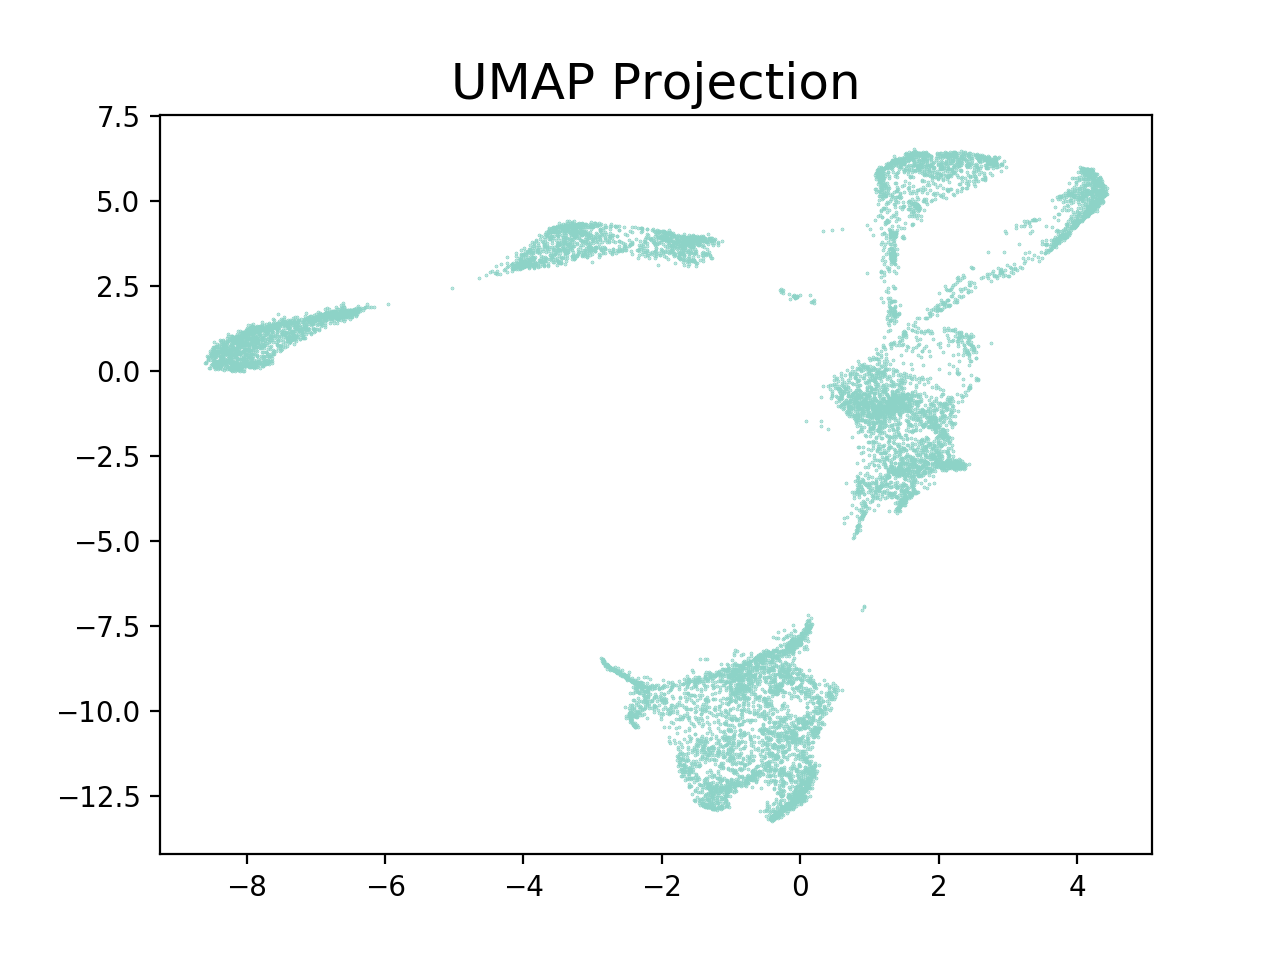

97.12193890431709 % of the data points were clustered
The HDBScan clustering yielded  12  classes


In [82]:
[num_labels, UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, UMAP_hdbscan_roi, clusterer] = analysis_embedding_clustering(corr_dist, 50, 'precomputed', 'Clustering_50_precomputed_all_eom_50', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

<IPython.core.display.Javascript object>


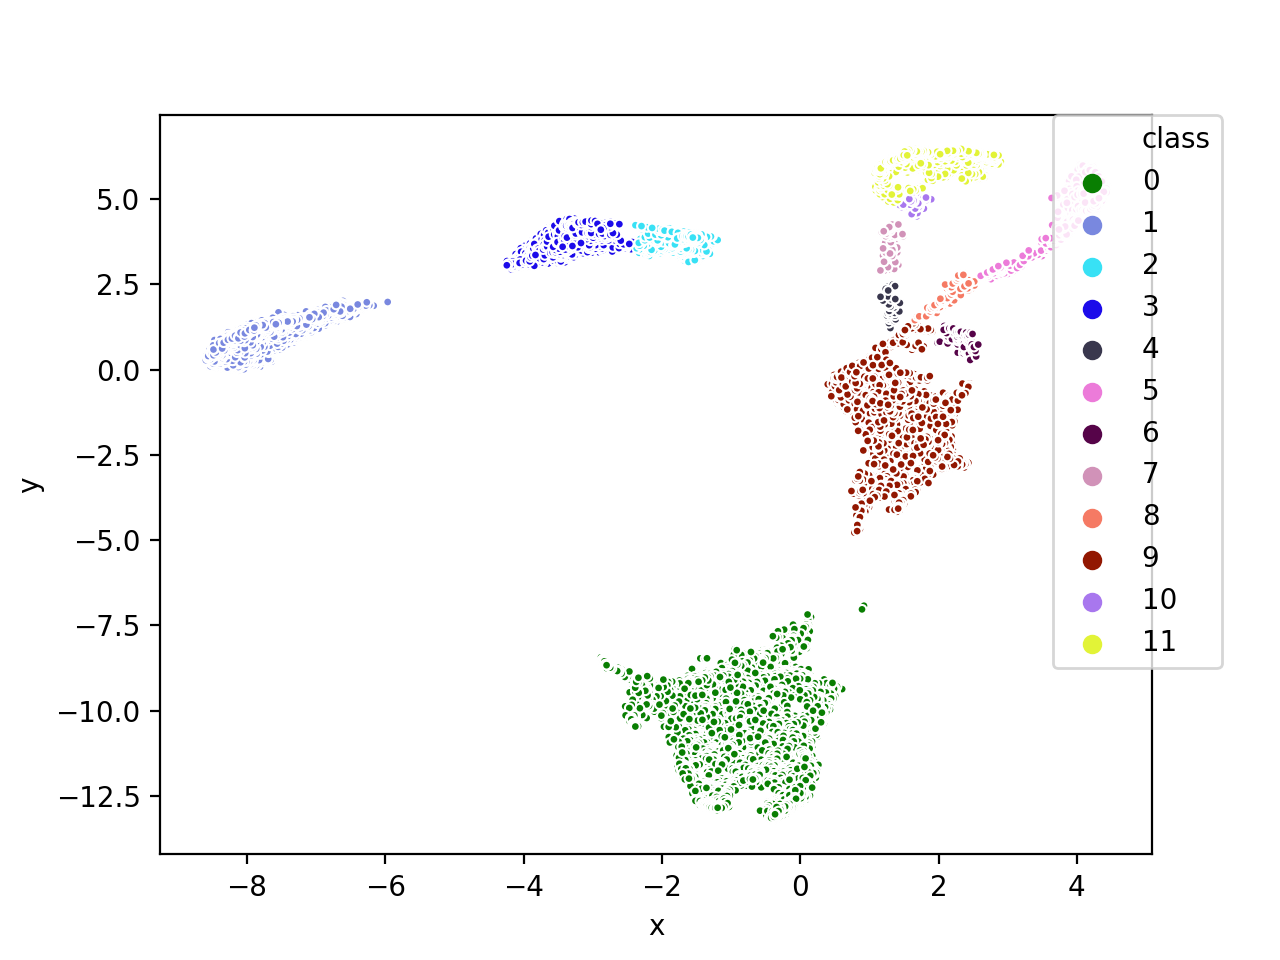

In [84]:
plotting_hdbscan(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, colors12, '/Users/jenniferthem/Masterthesis_Data', 'Clustering_50_precomputed_all_hdbscan_50_eom')

<IPython.core.display.Javascript object>


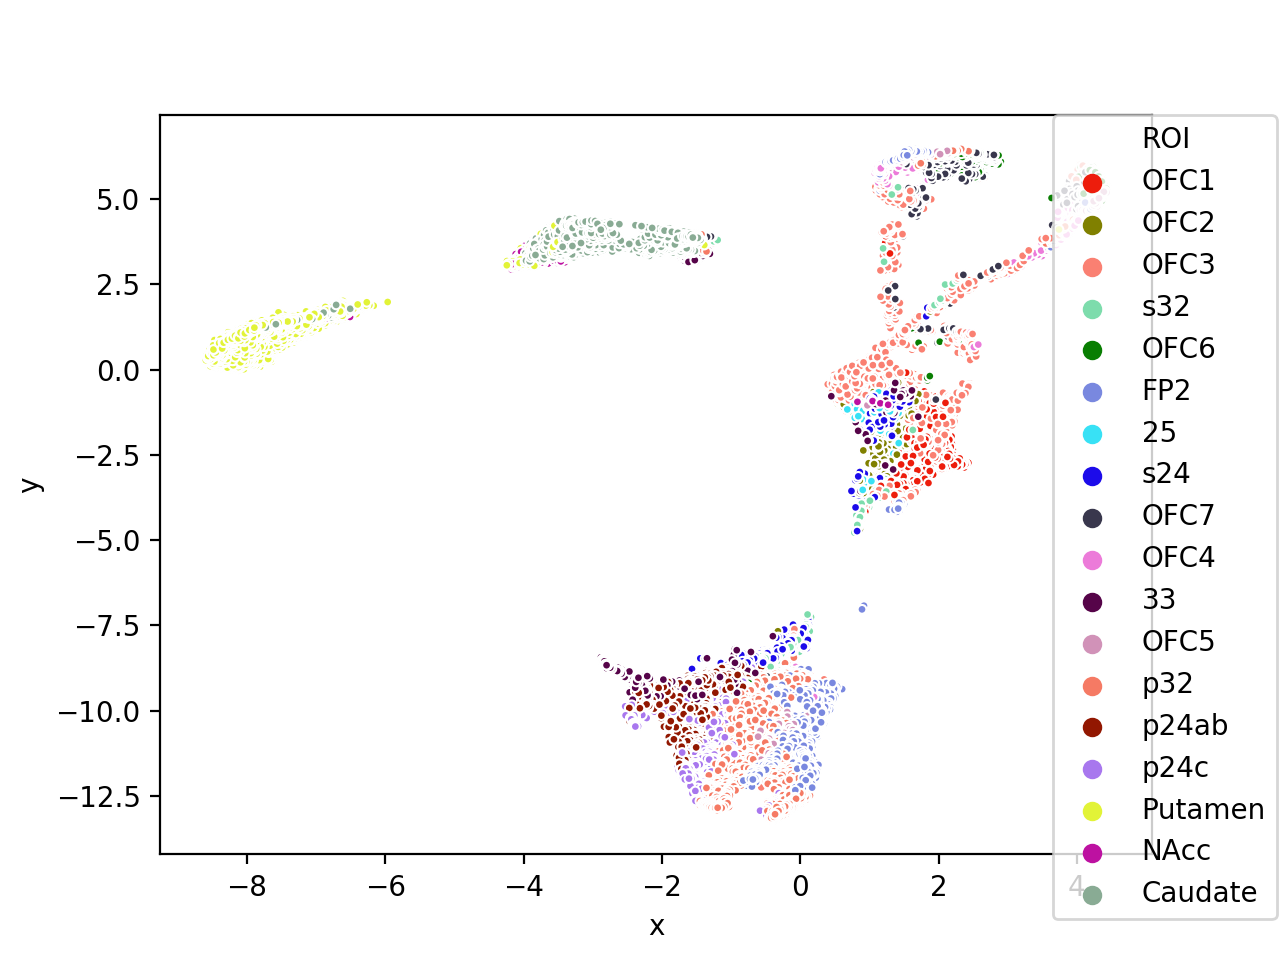

In [85]:
plotting_rois(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, colors18, '/Users/jenniferthem/Masterthesis_Data', 'Clustering_50_precomputed_all_ROI')

In [88]:
clu_roi_dic = create_cluster_roi_df(UMAP_hdbscan_roi, 12, keys, 'HDBScanLabel', '/Users/jenniferthem/Masterthesis_Data')

In [89]:
display(clu_roi_dic)

OFC1  OFC2  OFC3  OFC4  OFC5  OFC6  OFC7  s32  FP2   25  s24   33  \
Cluster_0      3     3    50    31    56    22    23  240  720    0  190  280   
Cluster_1      0     0     0     0     0     0     0    0    0    0    0    0   
Cluster_2      2     0    26     0     0     0     8   16    0    0    0   55   
Cluster_3      0     0     0     0     0     0     0    0    0    0    0    5   
Cluster_4      0     0    59     0     0     0     6    0    0    0    0    0   
Cluster_5      0     0    75   206   135   261   130    1   16    0    0    0   
Cluster_6      0     0    63     6     0     7     9    0    0    0    0    0   
Cluster_7     19     0   102     0     0     2     1    5    1    0    0    0   
Cluster_8      0     1    60     0     0     0     3   18    0    0    2    0   
Cluster_9    660   657   813     0     2     6     3   56   25  128  101   65   
Cluster_10     0     0    41     4     0     0    17    0    0    0    0    0   
Cluster_11     0     0    61   185   147   250   128    5   59    0    0    0   

             p32  p24ab  p24c  Putamen  NAcc  Caudate  
Cluster_0   1352    419   459        0     0        0  
Cluster_1      0      0     0     1585    11       35  
Cluster_2     38      0    11        7     8      370  
Cluster_3      0      0     0       67   160      636  
Cluster_4      0      0     0        0     0        0  
Cluster_5     17      0     1        1     0        0  
Cluster_6      0      0     0        0     0        0  
Cluster_7      0      0     0        0     0        0  
Cluster_8      0      0     0        0     0        0  
Cluster_9      0      0     0        0     4        0  
Cluster_10     0      0     0        0     0        0  
Cluster_11    29      0     0        0     0        0

#### 80 nearest neighbors in UMAP and minimum clustering size HDBScan is set to 50

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


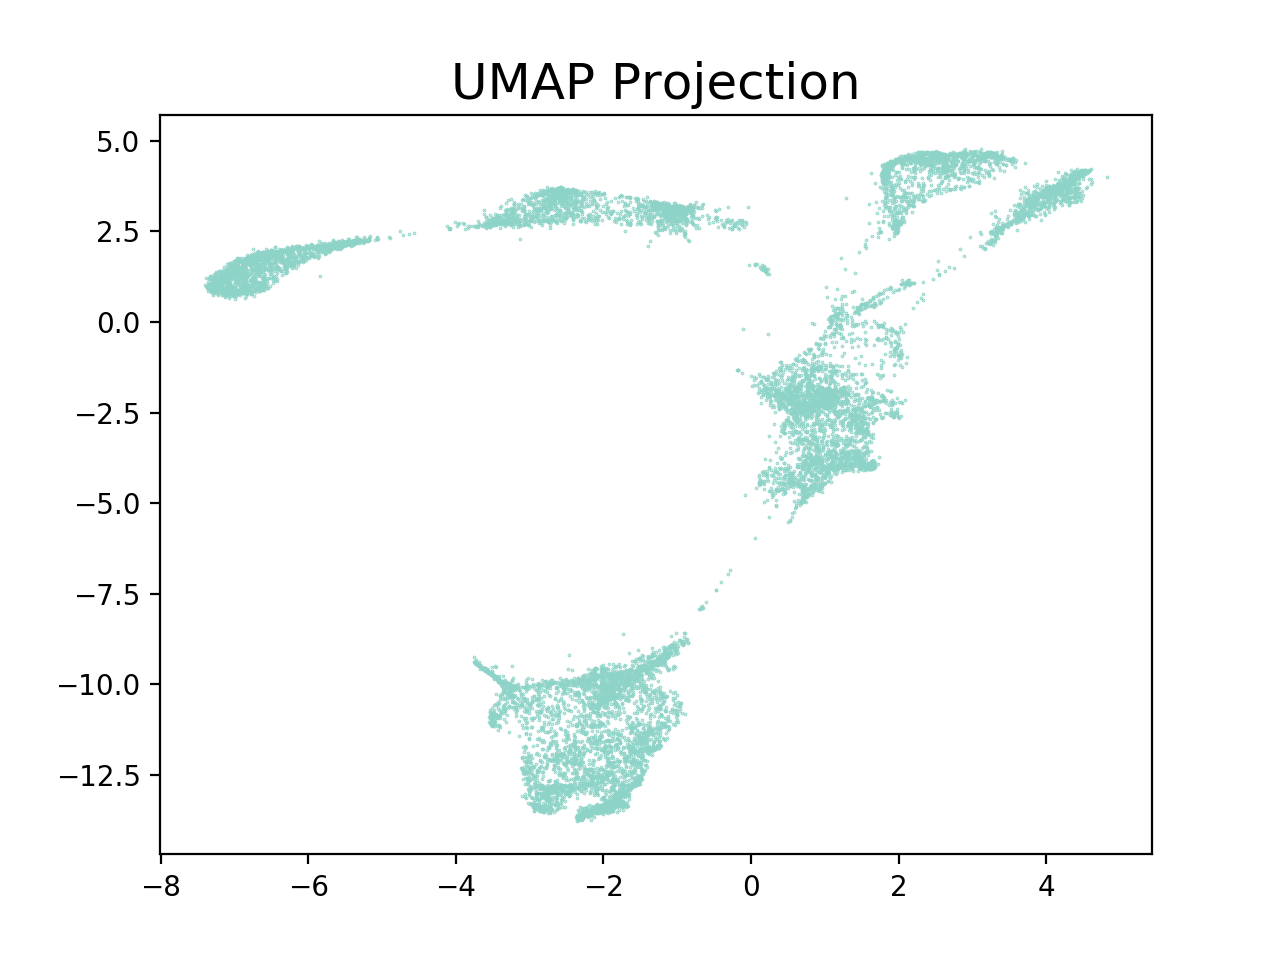

99.71387696709584 % of the data points were clustered
The HDBScan clustering yielded  6  classes


In [26]:
[num_labels_80, UMAP_hdbscan_labels_df_80, UMAP_roi_df_80, clustered_80, UMAP_hdbscan_roi_80, clusterer_80] = analysis_embedding_clustering(corr_dist, 80, 'precomputed', 'Clustering_80_precomputed_all_hdbscan_50_eom', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

<IPython.core.display.Javascript object>


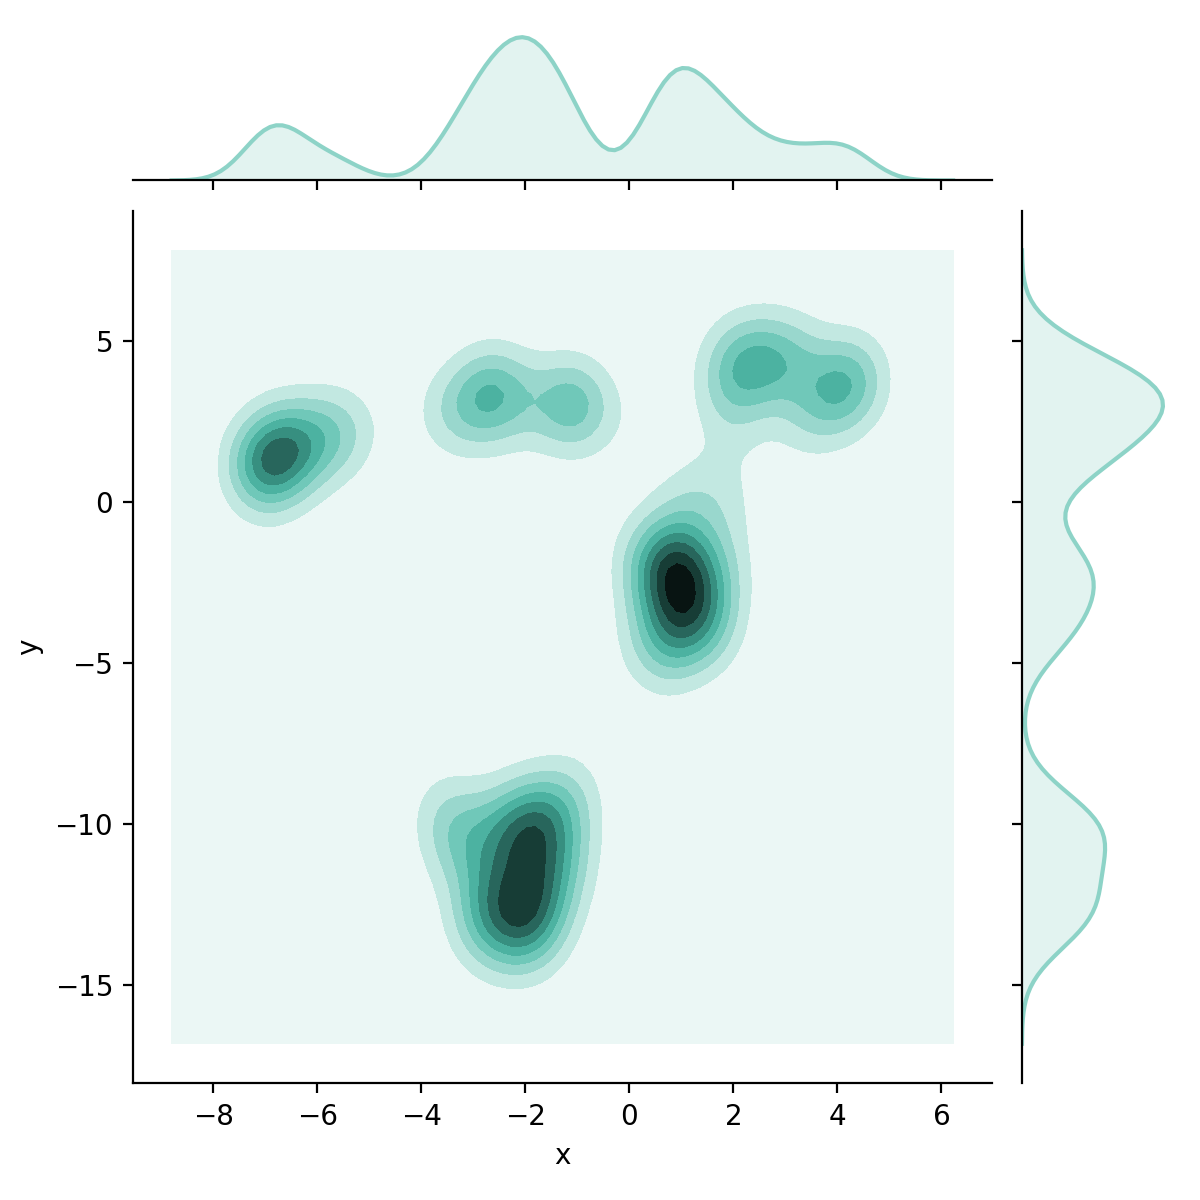

In [42]:
densitiy_plot = sns.jointplot(x="x", y="y", data=umap_sel_df, kind="kde");
plt.savefig('/Users/jenniferthem/Masterthesis_Data/Plots/density_plot.png')

<IPython.core.display.Javascript object>


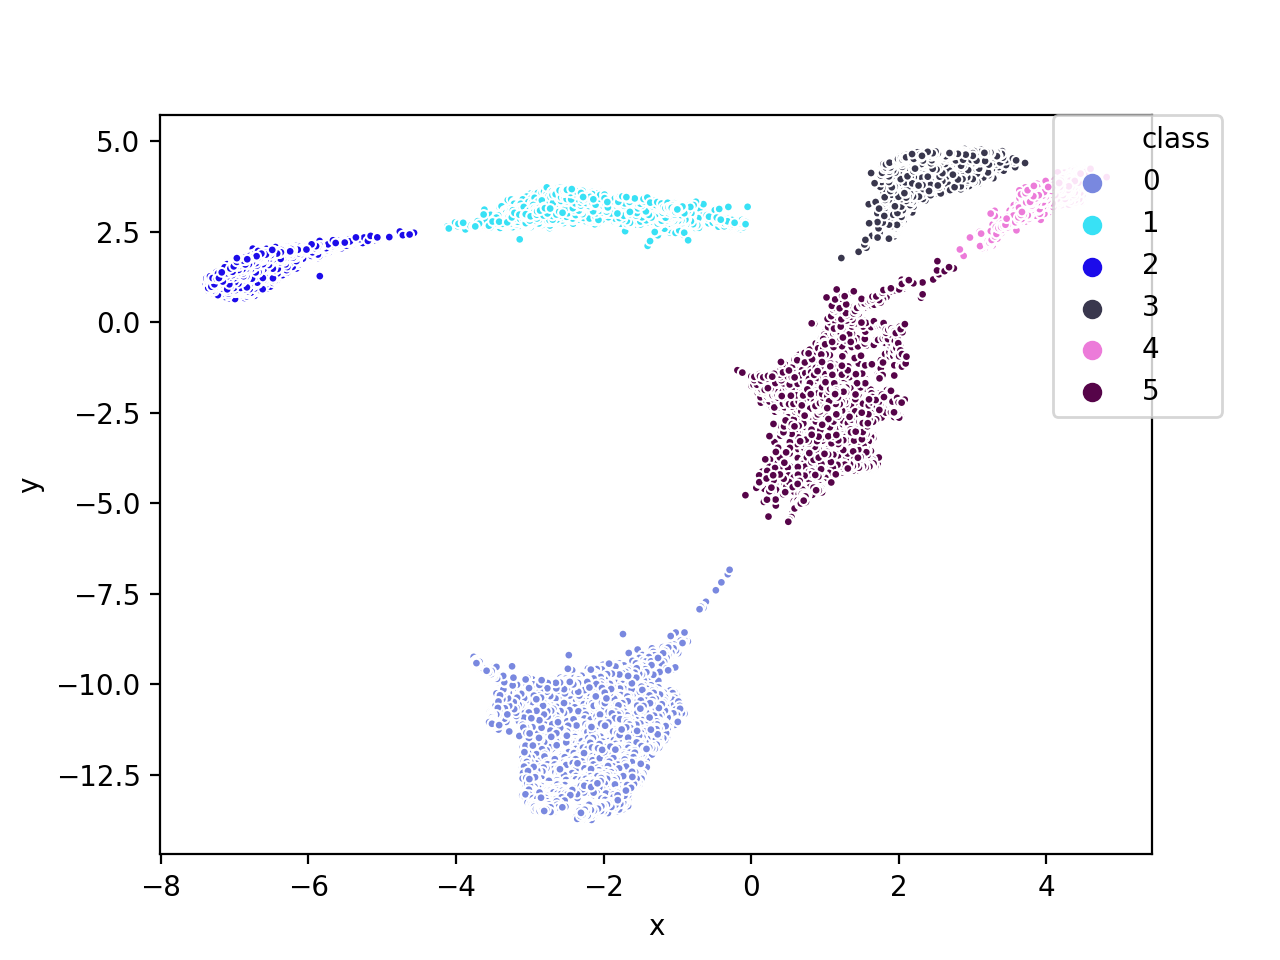

In [27]:
plotting_hdbscan(UMAP_hdbscan_labels_df_80, UMAP_roi_df_80, clustered_80, colors6, '/Users/jenniferthem/Masterthesis_Data', 'Umap_80_precomputed_all_hdbscan_50_eom')


<IPython.core.display.Javascript object>


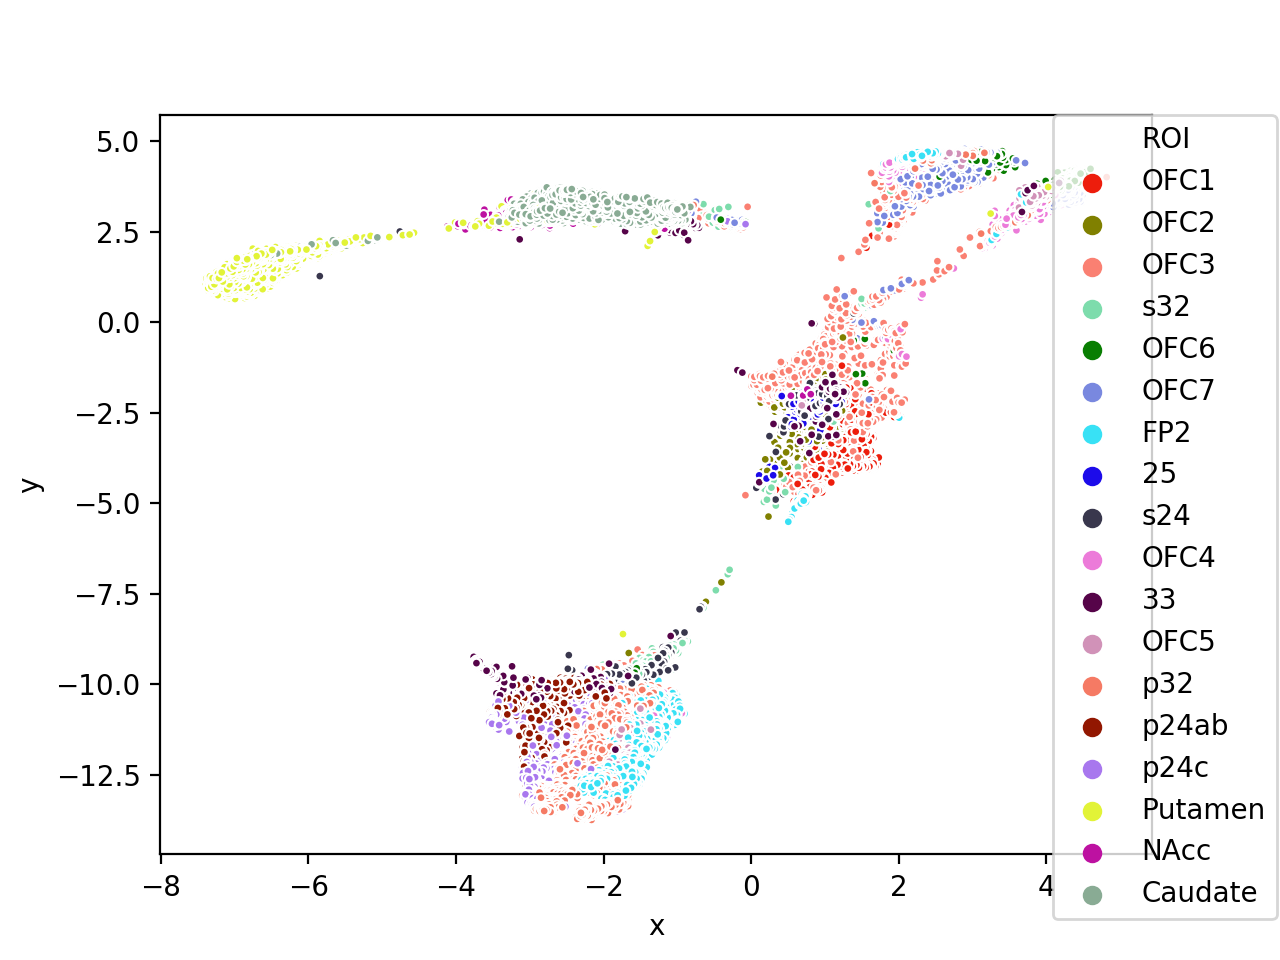

In [28]:
plotting_rois(UMAP_hdbscan_labels_df_80, UMAP_roi_df_80, clustered_80, colors18, '/Users/jenniferthem/Masterthesis_Data', 'Clustering_80_precomputed_all_ROI')

In [29]:
clu_roi_dic = create_cluster_roi_df(UMAP_hdbscan_roi_80, 6, keys, 'HDBScanLabel', '/Users/jenniferthem/Masterthesis_Data')
display(clu_roi_dic)

OFC1  OFC2  OFC3  OFC4  OFC5  OFC6  OFC7  s32  FP2   25  s24   33  \
Cluster_0     3     8    52    31    55    23    26  251  715    0  200  270   
Cluster_1     3     0    46     0     0     2    28   30    0    0    1   71   
Cluster_2     0     0     0     0     0     0     0    0    0    0    2    0   
Cluster_3    14     0   233   201   148   256   187   11   64    0    0    0   
Cluster_4     0     0    43   202   135   261   126    1   16    0    0    6   
Cluster_5   670   665  1092    10     3    14    25   59   31  128  101   77   

            p32  p24ab  p24c  Putamen  NAcc  Caudate  
Cluster_0  1349    419   459        1     0        0  
Cluster_1    42      0    13       84   176     1021  
Cluster_2     0      0     0     1584    11       36  
Cluster_3    32      0     0        0     0        0  
Cluster_4    17      0     1        2     0        0  
Cluster_5     2      0     0        0     4        0

#####  Further analysis with HDBScan results

In [40]:
umap = UMAP_hdbscan_labels_df_80.to_numpy()
umap_sel = umap[:,0:2]
umap_sel_df = pd.DataFrame(umap_sel)
umap_sel_df.columns = ['x', 'y']

Plotting HDBScan results in plot and dendrogram with same color palette

<IPython.core.display.Javascript object>


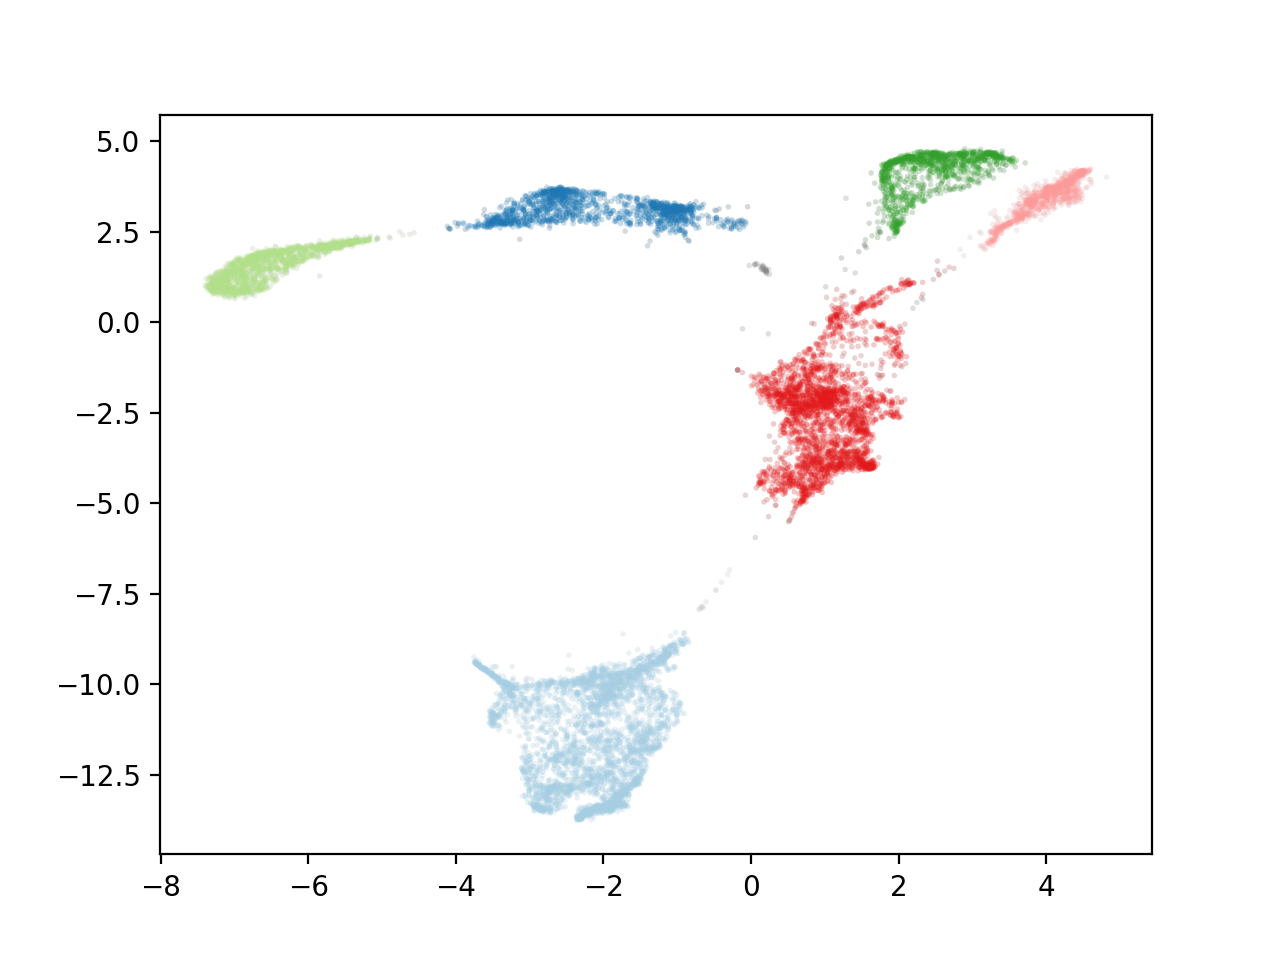

In [43]:
%matplotlib notebook
color_palette = sns.color_palette('Paired', 10)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer_80.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer_80.probabilities_)]
plt.scatter(umap_sel[:,0], umap_sel[:,1], s=4, linewidth=0, c=cluster_member_colors, alpha=0.25)
plt.savefig('/Users/jenniferthem/Masterthesis_Data/Plots/alternative_hdbscan_plot.png')

Condensed Tree with cluster selection

<IPython.core.display.Javascript object>


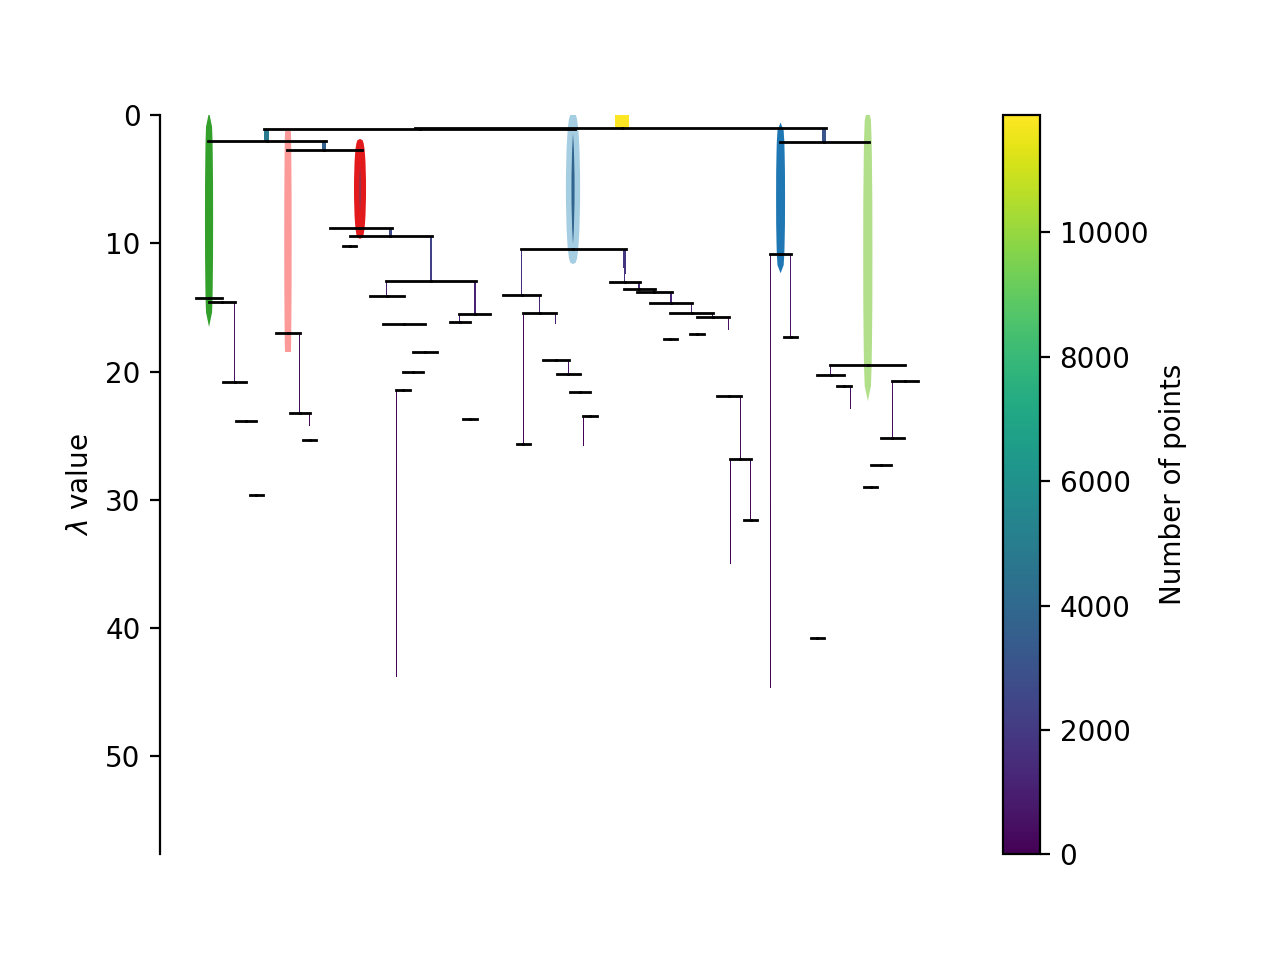

In [44]:
%matplotlib notebook

clusterer_80.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('Paired', 10))

plt.savefig('/Users/jenniferthem/Masterthesis_Data/Plots/condensed_tree.png')

<IPython.core.display.Javascript object>


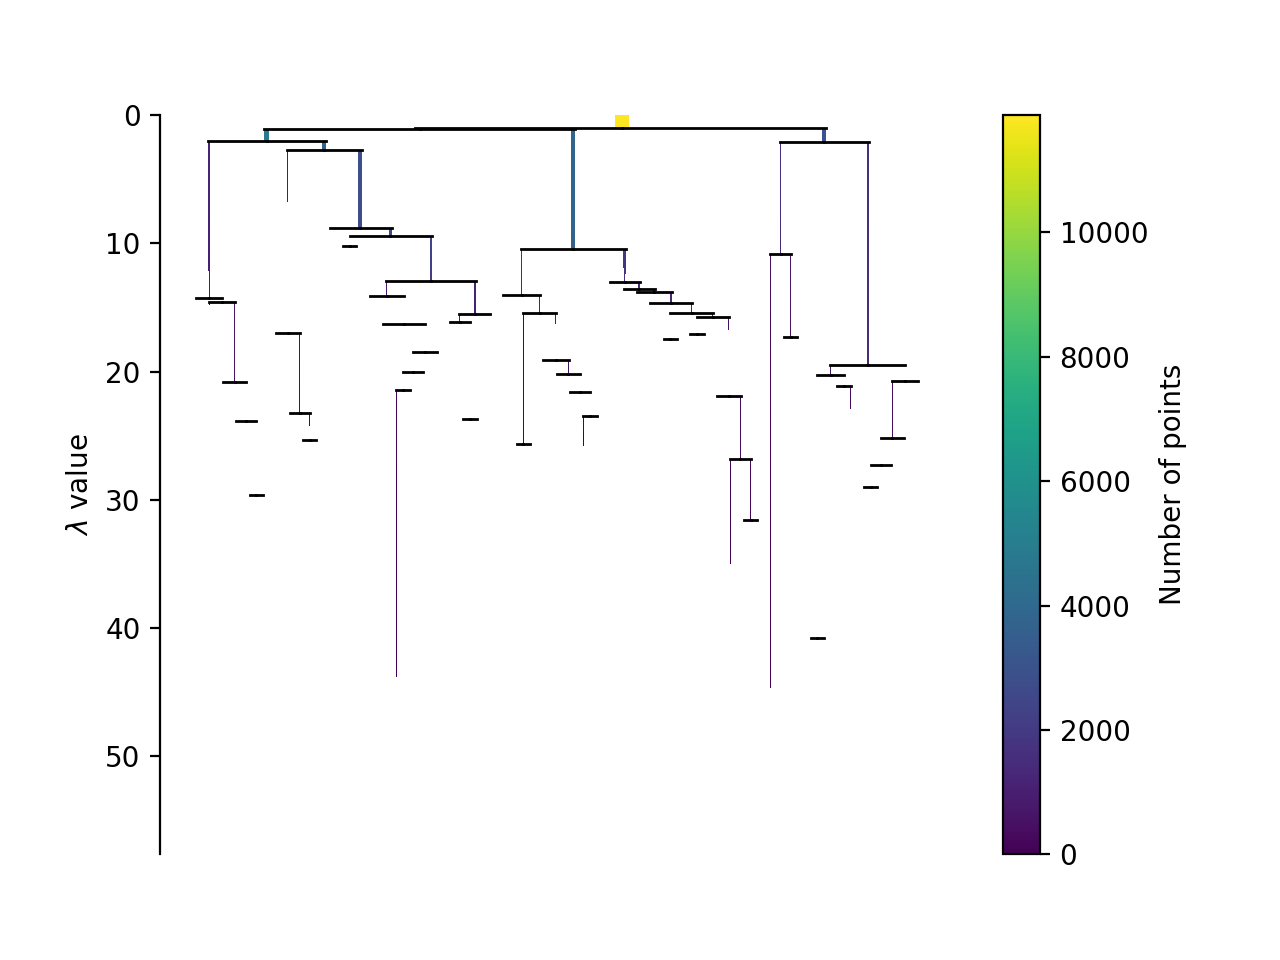

In [36]:
clusterer_80.condensed_tree_.plot()

Probabilities_  gives us a measure of the strength of cluster membership for each voxel

In [34]:
prob = clusterer_80.probabilities_
prob.shape

(11883,)

Minimum spanning tree - could not make the plot nicer because I think there are too many points in the clusters so it always looks like that

<IPython.core.display.Javascript object>


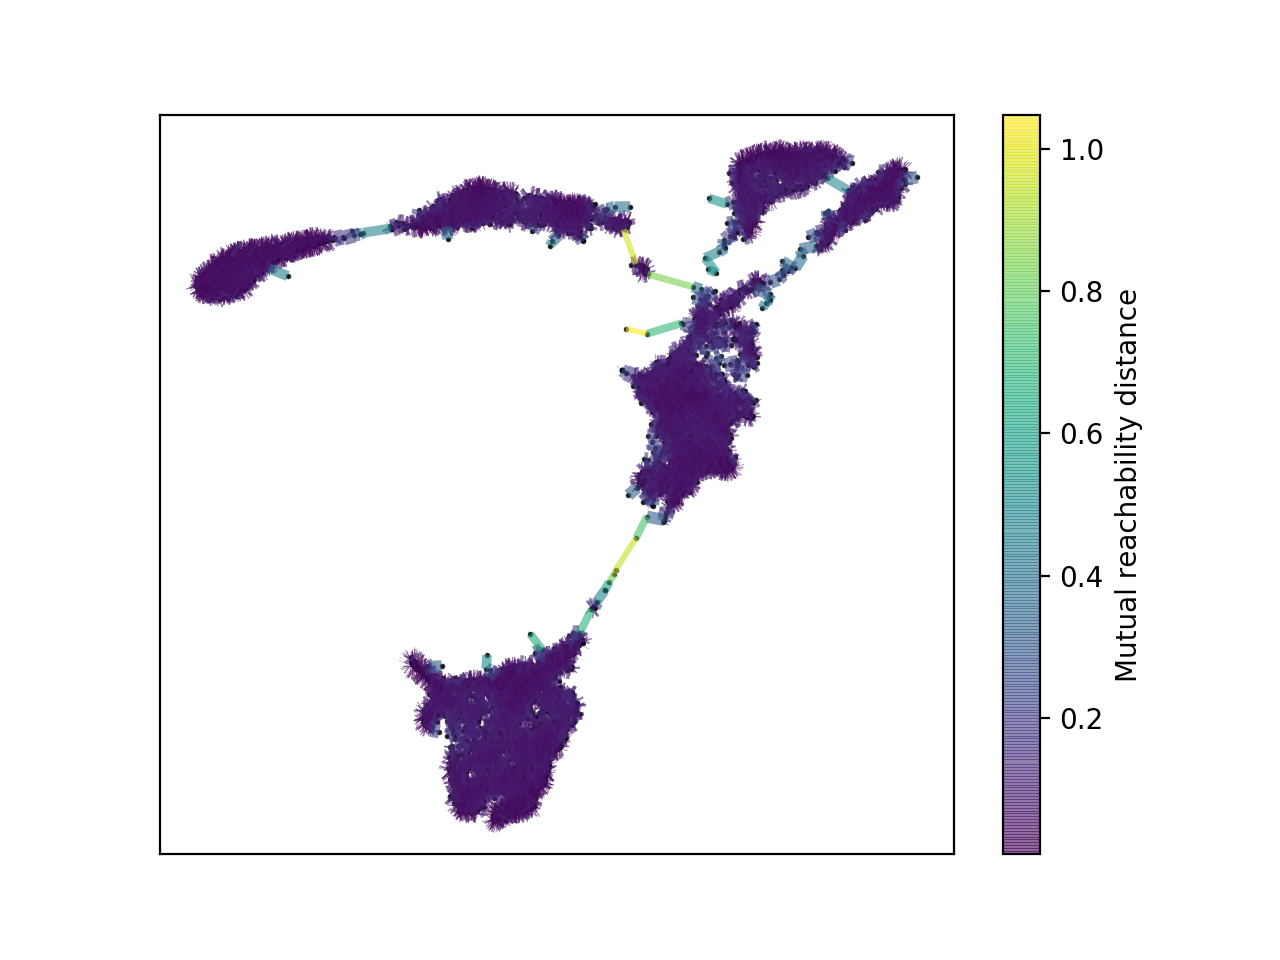

In [45]:
%matplotlib notebook
clusterer_80.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=1,
                                      edge_linewidth=2)

plt.savefig('/Users/jenniferthem/Masterthesis_Data/Plots/min_span_tree.png')

Getting a Networkx directed graph from the condensed tree

In [38]:
graph_network = clusterer_80.condensed_tree_.to_networkx()

#### 200 nearest neighbors in UMAP

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


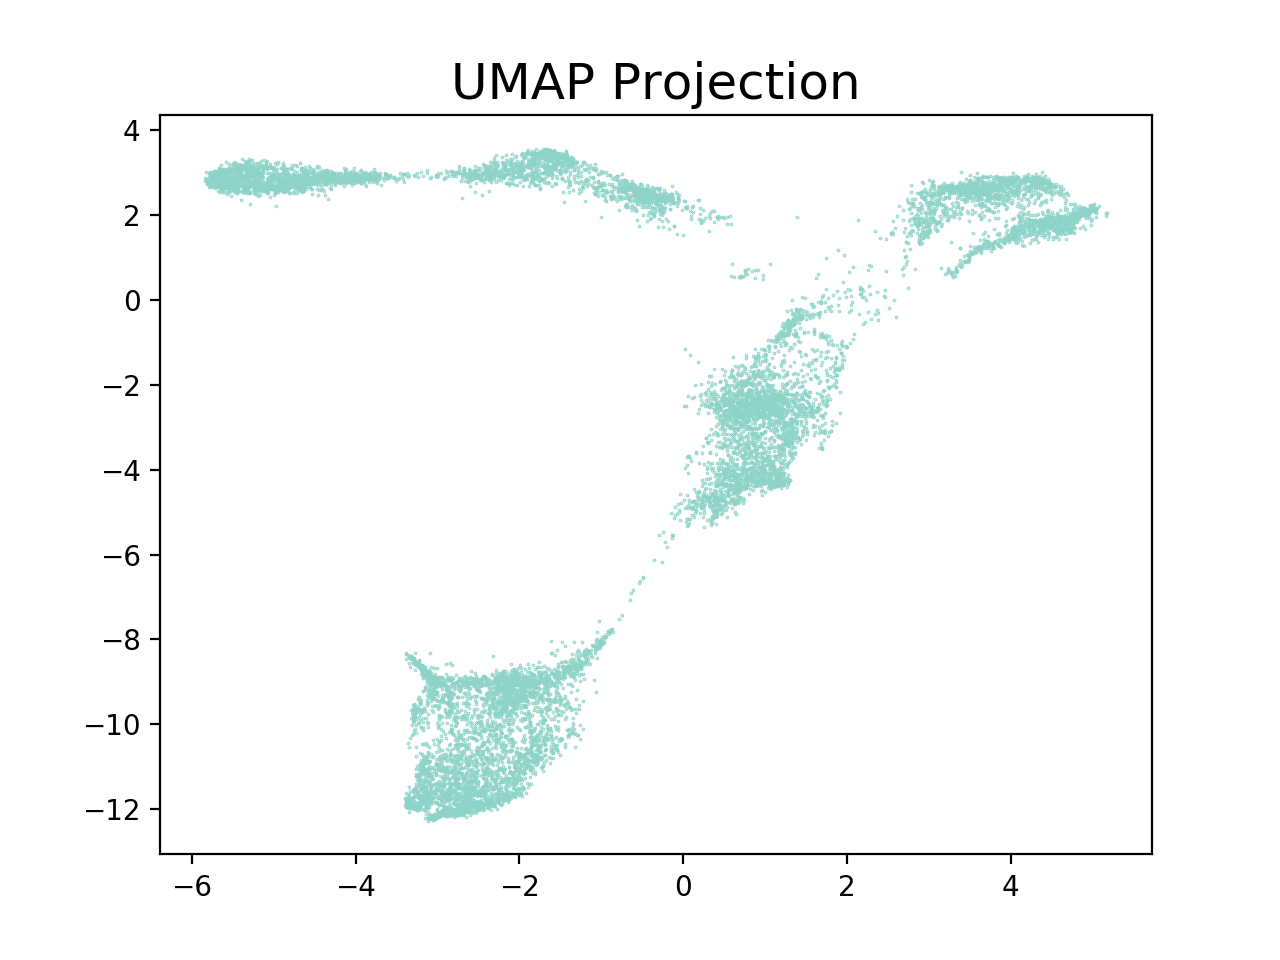

98.13178490280232 % of the data points were clustered
The HDBScan clustering yielded  7  classes


In [70]:
[num_labels, UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, UMAP_hdbscan_roi, clusterer_hdb] = analysis_embedding_clustering(corr_dist, 200, 'precomputed', 'Clustering_200_precomputed_all', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

<IPython.core.display.Javascript object>


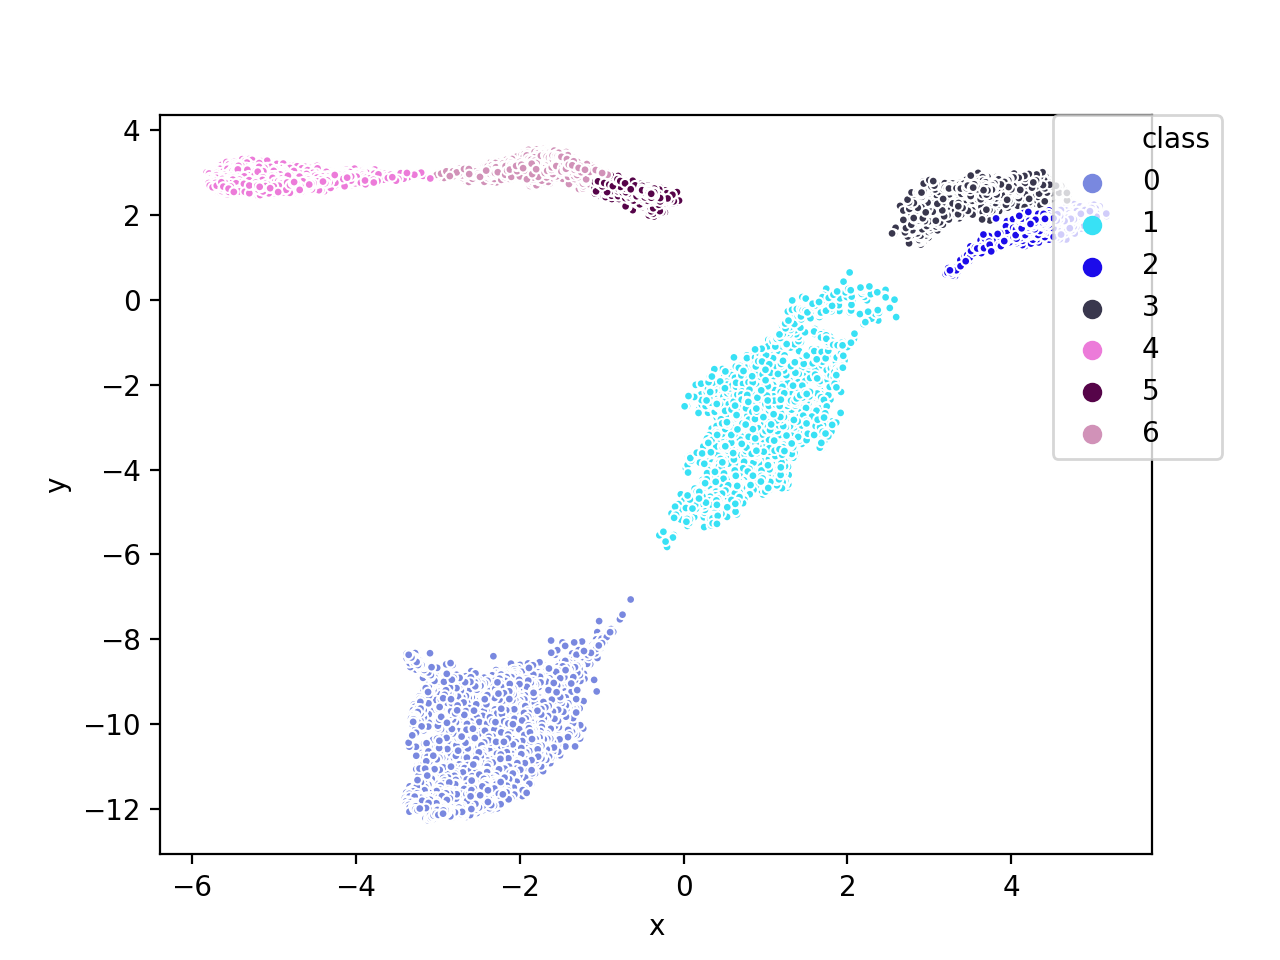

In [72]:
plotting_hdbscan(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, colors7, '/Users/jenniferthem/Masterthesis_Data', 'Clustering_200_precomputed_all_hdbscan_50_eom')

<IPython.core.display.Javascript object>


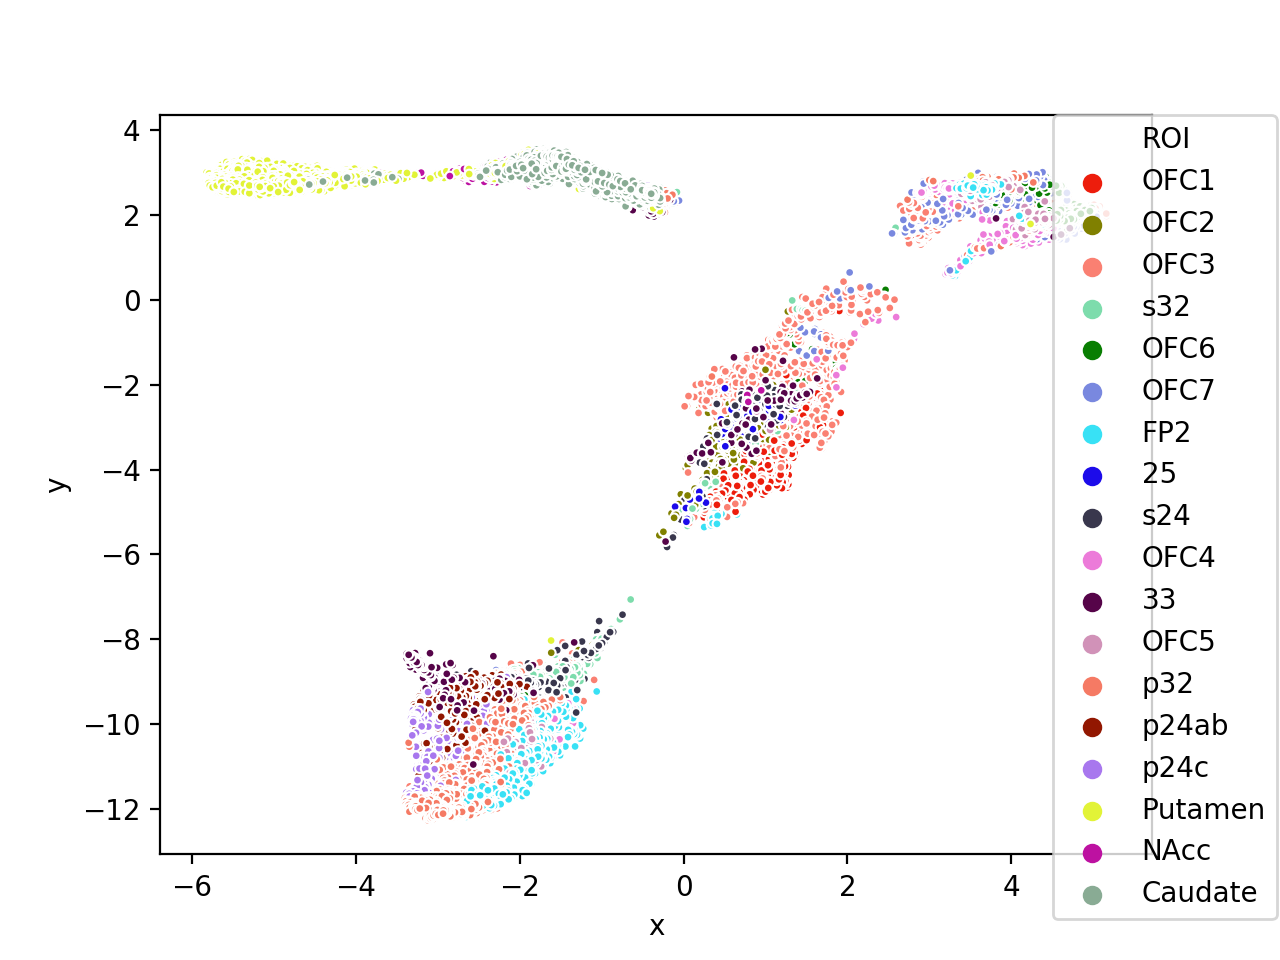

In [73]:
plotting_rois(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, colors18, '/Users/jenniferthem/Masterthesis_Data', 'Clustering_200_precomputed_all_ROI_hdbscan_50_eom')

In [76]:
clu_roi_dic = create_cluster_roi_df(UMAP_hdbscan_roi, 7, keys, 'HDBScanLabel', '/Users/jenniferthem/Masterthesis_Data')

In [77]:
clu_roi_dic

OFC1  OFC2  OFC3  OFC4  OFC5  OFC6  OFC7  s32  FP2   25  s24   33  \
Cluster_0     2     9    60    31    55    23    26  260  724    0  207  263   
Cluster_1   671   663  1091    13     3    15    24   48   21  128   89   83   
Cluster_2     0     0    37   196   133   259   127    1   16    0    0    4   
Cluster_3     9     0   204   204   150   256   183   10   65    0    0    0   
Cluster_4     0     0     0     0     0     0     0    0    0    0    2    3   
Cluster_5     3     0    33     0     0     0    10   22    0    0    1   41   
Cluster_6     0     0     0     0     0     0     0    0    0    0    0    5   

            p32  p24ab  p24c  Putamen  NAcc  Caudate  
Cluster_0  1348    419   458        1     0        0  
Cluster_1     2      0     0        0     4        0  
Cluster_2    16      0     1        1     0        0  
Cluster_3    32      0     0        1     0        0  
Cluster_4     0      0     0     1570    14       36  
Cluster_5    40      0    12        4     8      376  
Cluster_6     0      0     0       71   142      622

#### 300 nearest neighbors in UMAP

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


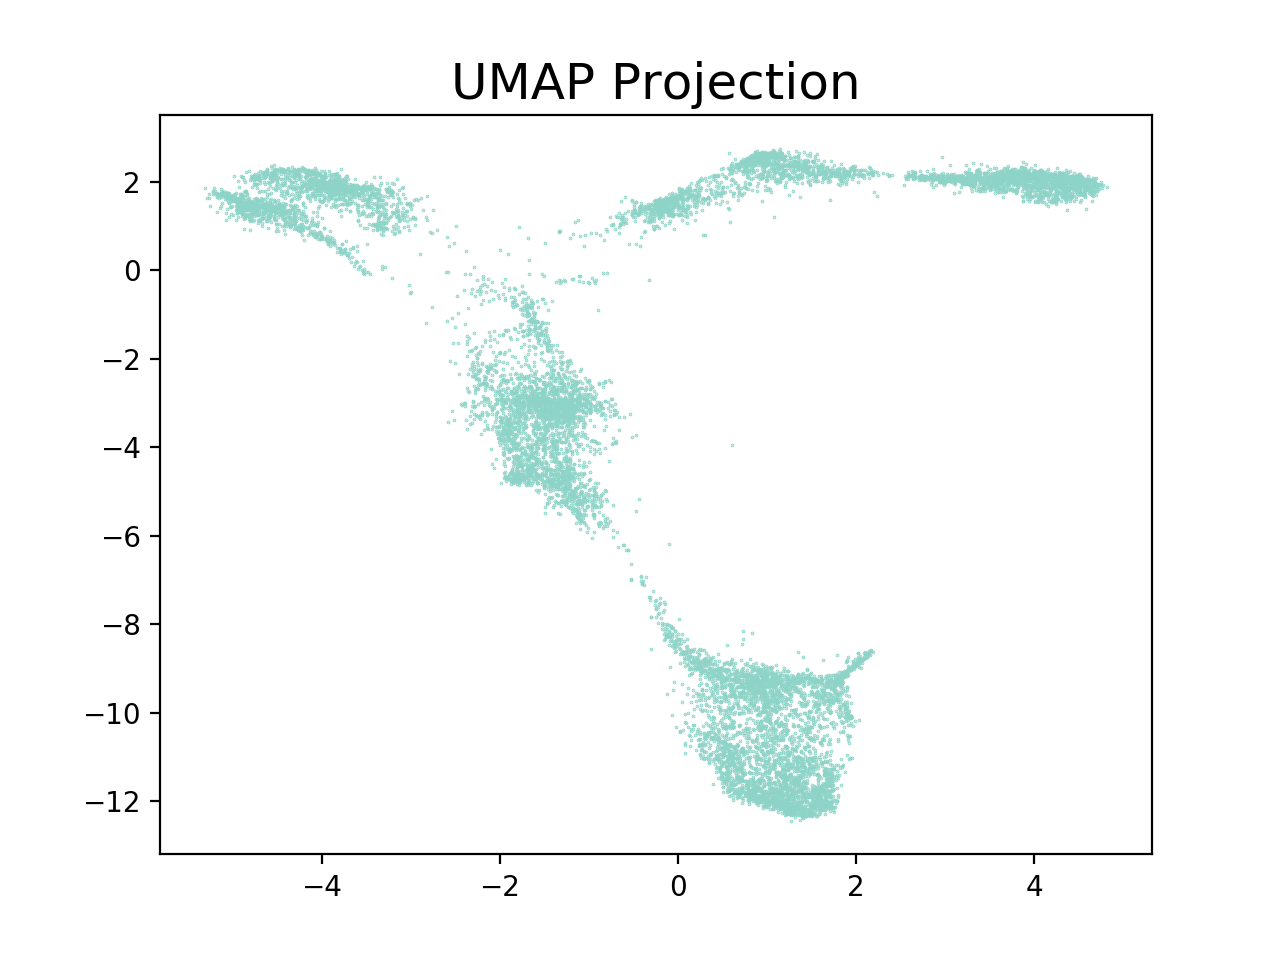

98.21593873600942 % of the data points were clustered
The HDBScan clustering yielded  6  classes


In [78]:
[num_labels, UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, UMAP_hdbscan_roi, clusterer] = analysis_embedding_clustering(corr_dist, 300, 'precomputed', 'Clustering_300_precomputed_all', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

<IPython.core.display.Javascript object>


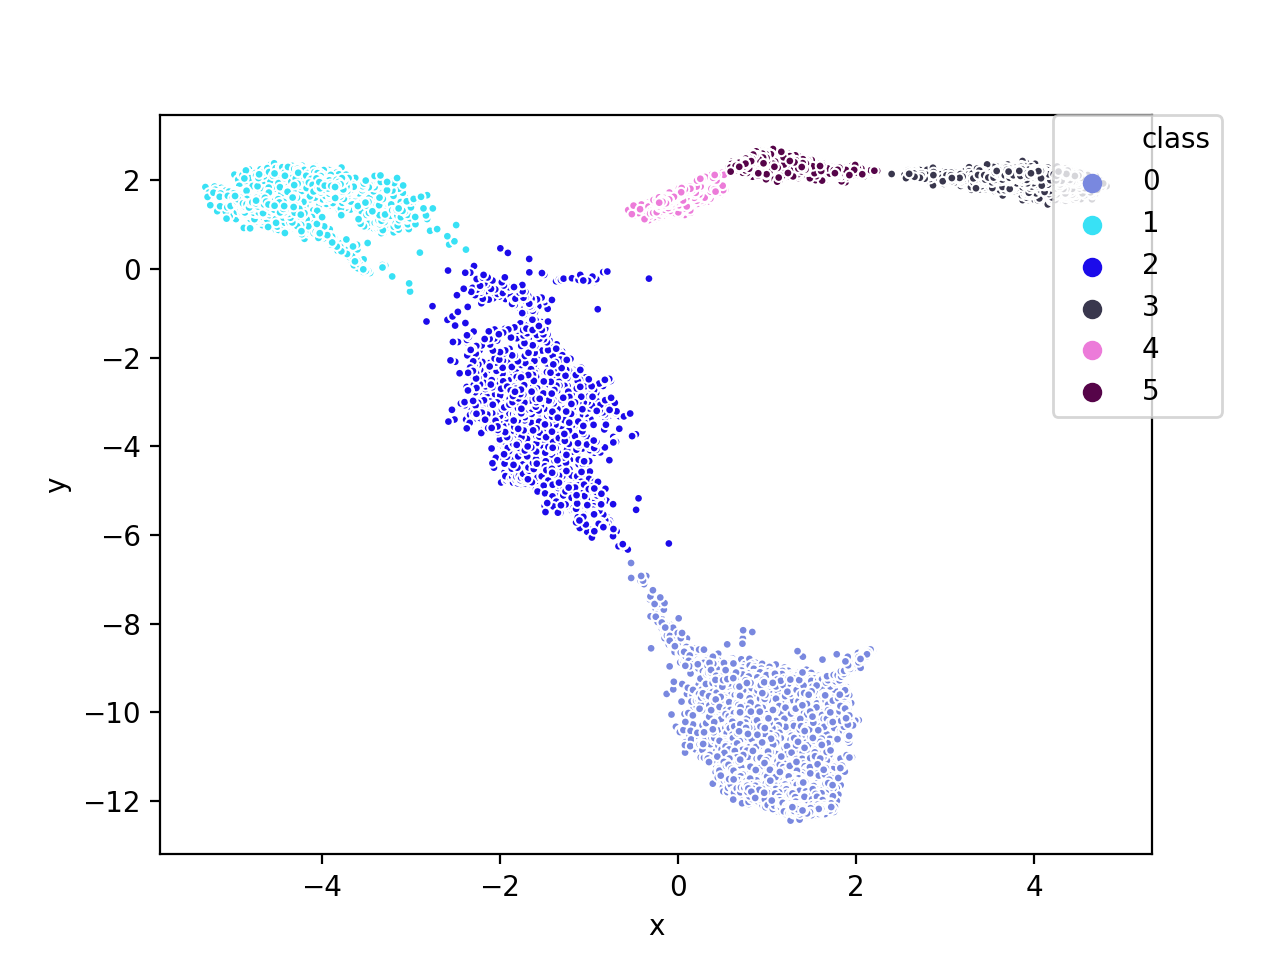

In [79]:
plotting_hdbscan(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, colors6, '/Users/jenniferthem/Masterthesis_Data', 'Clustering_300_precomputed_all_hdbscan_50_eom')

<IPython.core.display.Javascript object>


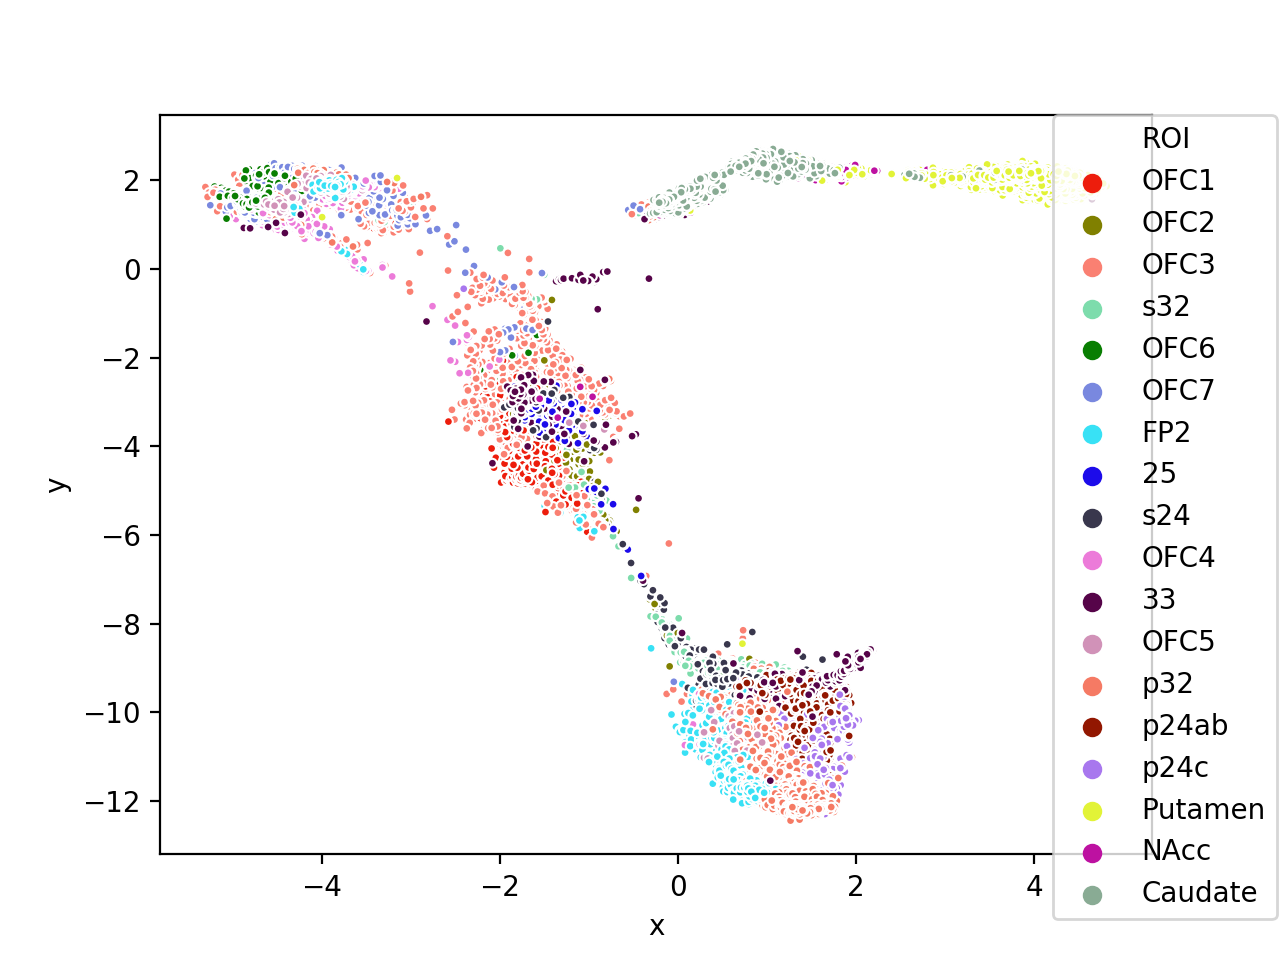

In [80]:
plotting_rois(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, colors18, '/Users/jenniferthem/Masterthesis_Data', 'Clustering_300_precomputed_all_ROI_hdbscan_50_eom')

In [52]:
clu_roi_dic = create_cluster_roi_df(UMAP_hdbscan_roi, 6, keys, 'HDBScanLabel', '/Users/jenniferthem/Masterthesis_Data')

In [53]:
display(clu_roi_dic)

OFC1  OFC2  OFC3  OFC4  OFC5  OFC6  OFC7  s32  FP2   25  s24  33  \
Cluster_0     0     0    42   196   135   261   124    1   16    0    0   0   
Cluster_1     2     0    20     0     0     0     7   15    0    0    1  54   
Cluster_2     0     0     0     0     0     0     0    0    0    0    0   0   
Cluster_3     0     0     0     0     0     0     0    0    0    0    0   4   
Cluster_4   483   303    47     0     0     0     0   20   27   14   28   4   
Cluster_5   137   305   598     0     2     0     0    1    0  110   60  59   
Cluster_6     0     0    18   100    98    10     0    0   55    0    0   0   
Cluster_7     0     0     2     0    17   128    69    2    0    0    0   0   
Cluster_8     0     0     0     0     0     0     0    0    0    0    0   0   
Cluster_9     0     0     0     0     0     0     0    0    0    0    0   0   

           p32  p24ab  p24c  Putamen  NAcc  Caudate  
Cluster_0   17      0     1        1     0        0  
Cluster_1   37      0    10        6     7      315  
Cluster_2    0      0     0       17     1      376  
Cluster_3    0      0     0       42   132       43  
Cluster_4    0      0     0        0     0        0  
Cluster_5    0      0     0        0     4        0  
Cluster_6    2      0     0        0     0        0  
Cluster_7   21      0     0        0     0        0  
Cluster_8    0      0     0      465     0        0  
Cluster_9    0      0     0      467     5       29